# Predicting Credit Card Behavior in United States


## Introduction and Background

This short paper will help to predict the credit card behavior based on demographic and household characteristics in the United States. Demographic indicators such as age, gender, marital status, financial literacy, education and profession along with household characteristics such as household income state and region of residence will be used to predict the credit card behavior. These variables play might play crucial role in determining the credit card behavior of any individual.

## Problem Statement


Individuals are different and exhibit diverse behaviors, however a general prediction model could be used to asses one's behavior. Global financial crisis of 2007-2008 is greatly considered as a result of subprime mortgage loans in the United States. In addition, a huge amount of credit card payments goes pending every month in the US. While credit card debt has increase around 32% in the last five years. Therefore, to avoid future banking crisis, it is important to devise a mechanism that can predict the credit card behavior of the potential user.

## Data Description


In this research I will use an open source dataset 'The National Financial Capability Study' (NFCS) provided by FINRA. This dataset is a primary data collected from the US citizens with an interval of three years. The first round of survey was conducted in the year of 2009 following the Global financial turmoil. Later on, second round was conducted in 2012, third in 2015 and most recent survey was conducted in 2018. More detail of the dataset can be found [here](https://www.usfinancialcapability.org/) and can be downloaded [here](https://www.usfinancialcapability.org/downloads.php). This dataset includes a wide range of financial, demographic and professional indicators of American Citizens from all the regions and states. Since dataset includes regional information, I will use Foursquare API to access Foursquare location data for US to compare the US states based on credit card behavior. I will combine the NFCS dataset with the US location data in order to explore the areas and states with good credit records and bad credit records. This result of this analysis might be useful for banks and other financial institutions as well as for Government to devise credit policy in the different regions based on the credit card behavior of the population.


In [2]:
##Importing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [3]:
path ='/Users/rizwanmushtaq/Desktop/Python_Tutorial/NFCS2018_09_19.csv'


In [7]:
df1 = pd.read_csv(path, dtype= 'unicode', decimal=',')


In [8]:
df1.head()

,TRACK,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,...,M21_4,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018,2018010001,48,9,4,2,5,11,1,5,...,,1,3,98,98,98,1,0.68368306,0.51964208,1.09518877
1,2018,2018010002,10,5,3,2,2,8,1,6,...,,1,3,98,3,1,98,0.80835753,2.51684077,0.92269329
2,2018,2018010003,44,7,3,2,2,8,1,6,...,,1,1,98,98,1,98,1.02155141,1.89619186,0.67109295
3,2018,2018010004,10,5,3,2,1,7,1,6,...,,98,98,4,4,2,98,0.80835753,2.51684077,0.92269329
4,2018,2018010005,13,8,4,1,2,2,1,6,...,,1,3,98,2,1,98,0.4480747,0.61473322,1.23222123


In [11]:
df1['J32'].value_counts()

      53655
5     24438
4      9890
3      8837
2      6311
98     2611
1      2197
99      371
Name: J32, dtype: int64

In [15]:
#Renaming required columns
df2 = df1.rename(columns={'A3':'gender','A3Ar_w':'agegrp', "A3B":"agegen",'A4A_new_w': "ethn", 'A5_2015':'edu' , 'A6':'marital' ,  'A7':'living',
     'A7A':'maritalvar',  'A8':'hhincome' ,  'AM21':'armservice',  'AM30':'service',  'AM31':'retired' ,
    'AM22':'spousearm', 'A9':'prof' ,  'A10':'profspouse', 'A21_2015':'ptimestudent',
     'A22_2015':'currentstudent',  'M6':'interest', 'M7':'inflation',  'M8':'bond',  'M31':'cinterest', 'M9':'mortgage', 'M10':'risk',
     'J1':'finsatisfacton',  'J2':'willingrisk', 'J3':'spendingincome',  'J5':'savingunforseen',  'J6':'savingchildedu',
     'J32':'creditrecord', 'B1':'fininc1',  'B2':'fininc2',  'B4':'fininc3',  'B14':'invest',  'E7':'homemort',  'E15_2015':'mortpayment',
    'F2_1':'creditcardpayment', 'F2_3':'minpayment', 'F2_4':'latefee' ,'F2_5': 'limitfee' , 'G20':'unpaidbil' ,
    'G25_2':'paydayloan' , 'G23':'toomuchdebt','M20': 'fineducschool' ,
     'M21_1':'fineduchschool' ,  'M21_2_2015':'fineduccollege' ,  'M21_3':'fineducepmloyer' , 
    'M1_1':'finconfdaytoday' , 'M1_2':'finconf_math' ,  'A14':'mostknowledge' ,  'J20':'howconfident', 'STATEQ':'usstate' ,  'CENSUSDIV':'censusdiv' , 'CENSUSREG':'censusreg' }, errors="raise")


In [16]:
#Renaming required columns
df3 = df2[['gender','agegrp', 'ethn', 'edu', 'marital', 'hhincome', 'armservice',  'service',  'retired',
    'spousearm', 'prof', 'profspouse','ptimestudent','currentstudent',  
     'finsatisfacton',  'willingrisk', 'spendingincome', 'savingunforseen', 'savingchildedu',
     'creditrecord', 'fininc1',  'fininc2',  'fininc3',  'invest',  'homemort',  'mortpayment',
    'creditcardpayment', 'minpayment', 'latefee', 'limitfee', 'unpaidbil',
    'paydayloan', 'toomuchdebt', 'fineducschool','fineduchschool',  'fineduccollege',  'fineducepmloyer', 
    'finconfdaytoday', 'finconf_math',  'mostknowledge',  'howconfident', 'usstate',  'censusdiv', 'censusreg',
    'interest', 'inflation', 'bond', 'cinterest', 'mortgage', 'risk']]

In [17]:
df3 = df3.replace('99', np.nan)
df3 = df3.replace('98', np.nan)

In [19]:
df3.head()
df3.shape

(108310, 50)

In [20]:
df3.isnull()

,gender,agegrp,ethn,edu,marital,hhincome,armservice,service,retired,spousearm,...,howconfident,usstate,censusdiv,censusreg,interest,inflation,bond,cinterest,mortgage,risk
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108305,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,True
108306,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
108307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
108308,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [21]:
rows_before = df3.shape[0]
df3 = df3.dropna()
rows_after = df3.shape[0]

In [22]:
rows_before - rows_after


72354

In [23]:
df3['inter'] = df3['interest'].replace(['2', '3'], '0')
df3['infl'] = df3['inflation'].replace(['1', '2'], '0')
df3['infl'] = df3['infl'].replace(['3'], '1')
df3['bnd'] = df3['bond'].replace(['1', '3', '4'], '0')
df3['bnd'] = df3['bnd'].replace(['2'], '1')
df3['mort'] = df3['mortgage'].replace(['2'], '0')
df3['mort'] = df3['mort'].replace(['2'], '1')
df3['cinter'] = df3['cinterest'].replace(['1', '3', '4', ' '], '0')
df3['cinter'] = df3['cinter'].replace(['2'], '1')
df3['rsk'] = df3['risk'].replace(['1'], '0')
df3['rsk'] = df3['rsk'].replace(['2'], '1')

In [26]:
df3['rsk'] = pd.to_numeric(df3['rsk'])
df3['inter'] = pd.to_numeric(df3['inter'])
df3['infl'] = pd.to_numeric(df3['infl'])
df3['cinter'] = pd.to_numeric(df3['cinter'])
df3['bnd'] = pd.to_numeric(df3['bnd'])
df3['mort'] = pd.to_numeric(df3['mort'])

In [27]:
fl  = df3['rsk'] + df3['mort'] + df3['cinter'] + df3['bnd'] + df3['infl'] + df3['inter']
df3['fl'] = fl

In [34]:
df3['credit'] = pd.to_numeric(df3['creditrecord'], errors='coerce').fillna(0).astype(int)

In [35]:
df3['credit'].mean()

1.9478807431304928

In [38]:
df3['credit_bin'] = df3['credit'].apply(lambda x: 1 if x >= 2 else 0)

In [48]:
df3['credit_bin'].value_counts()

0    19946
1    16010
Name: credit_bin, dtype: int64

In [40]:
#df3['censusreg'] = pd.to_numeric(df3['censusreg'], errors='coerce')
df3['gender'] = pd.to_numeric(df3['gender'])
df3['agegrp'] = pd.to_numeric(df3['agegrp'])
df3['ethn'] = pd.to_numeric(df3['ethn'])
df3['edu'] = pd.to_numeric(df3['edu'], errors='coerce').fillna(0).astype(int)
df3['marital'] = pd.to_numeric(df3['marital'])
df3['hhincome'] = pd.to_numeric(df3['hhincome'])
df3['armservice'] = pd.to_numeric(df3['armservice'], errors='coerce').fillna(0).astype(int)
df3['retired'] = pd.to_numeric(df3['retired'], errors='coerce').fillna(0).astype(int)
df3['prof'] = pd.to_numeric(df3['prof'])
df3['profspouse'] = pd.to_numeric(df3['profspouse'], errors='coerce').fillna(0).astype(int)
df3['currentstudent'] = pd.to_numeric(df3['currentstudent'], errors='coerce').fillna(0).astype(int)
df3['finsatisfacton'] = pd.to_numeric(df3['finsatisfacton'])
df3['willingrisk'] = pd.to_numeric(df3['willingrisk'])
df3['savingchildedu'] = pd.to_numeric(df3['savingchildedu'], errors='coerce').fillna(0).astype(int)
df3['finconfdaytoday'] = pd.to_numeric(df3['finconfdaytoday'])
df3['usstate'] = pd.to_numeric(df3['usstate'])
df3['censusdiv'] = pd.to_numeric(df3['censusdiv'])
df3['censusreg'] = pd.to_numeric(df3['censusreg'])

In [42]:
Features = df3[['gender','agegrp','ethn', 'edu', 'marital', 'hhincome', 'armservice', 'retired','prof',
               'profspouse','currentstudent', 'finsatisfacton', 'willingrisk', 'savingchildedu','finconfdaytoday','fl', 'usstate','censusdiv','censusreg']]

In [43]:
X = StandardScaler().fit(Features).transform(Features)
X

array([[ 1.24002122, -1.93622569, -0.54426605, ..., -0.00968403,
        -0.45492667, -0.64656976],
       [-0.80643781, -1.28873421, -0.54426605, ..., -0.34800403,
        -0.06360267,  0.30016677],
       [ 1.24002122,  1.30123169, -0.54426605, ..., -1.09230803,
        -0.06360267,  0.30016677],
       ...,
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629],
       [ 1.24002122,  1.30123169, -0.54426605, ...,  0.93761198,
        -1.62889868, -1.59330629]])

In [49]:
y = df3['credit_bin'].values


In [50]:
#here we split the data sets into test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (28764, 19) (28764,)
Test set: (7192, 19) (7192,)


In [51]:
#In order to apply KNN we need to import library
from sklearn.neighbors import KNeighborsClassifier

In [52]:
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [53]:
yhat = knn.predict(X_test)
yhat[0:5]

array([0, 0, 1, 1, 0])

In [54]:
#now we test the accuracy
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9624878320122375
Test set Accuracy:  0.9502224694104561


In [55]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [56]:
centers = model.cluster_centers_
centers

array([[-2.50848380e-01, -2.86248109e-01, -2.22346186e-02,
        -8.38524310e-01, -2.75079631e-01,  2.61463049e-01,
        -1.35516851e+00, -2.77633299e-01, -4.62418994e-01,
        -1.73764145e-01, -1.61598596e-01, -2.71166925e-01,
         5.70627087e-02,  9.34574964e-02,  1.39941948e-01,
         1.02938211e-01, -1.13504509e-01,  7.41360062e-01,
         7.77880281e-01],
       [-1.40307010e-01, -1.74813582e-01, -2.79350339e-01,
         5.33723182e-01, -2.47186839e-01,  5.32157672e-01,
         7.44557343e-01, -2.36861972e-01, -6.18871091e-01,
        -2.74618909e-01, -1.57624864e-01,  2.38678413e-01,
         3.45417782e-01,  8.57483117e-02,  1.98268421e-01,
         3.96605826e-01,  1.79784168e-01, -1.05158089e+00,
        -1.11228106e+00],
       [ 3.90032098e-02, -4.56330664e-01,  1.44681890e-01,
        -5.21366125e-01,  1.41059644e-01, -6.43203610e-01,
        -3.57044090e-01, -2.48313234e-01, -3.57396999e-02,
        -3.30122997e-01, -1.49996547e-01, -7.88660528e-01,
    

In [57]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [58]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [69]:
P = pd_centers(Features, centers)
P

,gender,agegrp,ethn,edu,marital,hhincome,armservice,retired,prof,profspouse,currentstudent,finsatisfacton,willingrisk,savingchildedu,finconfdaytoday,fl,usstate,censusdiv,censusreg,prediction
0,-0.250848,-0.286248,-0.022235,-0.838524,-0.275080,0.261463,-1.355169,-0.277633,-0.462419,-0.173764,-0.161599,-0.271167,0.057063,0.093457,0.139942,0.102938,-0.113505,0.741360,0.777880,0
1,-0.140307,-0.174814,-0.279350,0.533723,-0.247187,0.532158,0.744557,-0.236862,-0.618871,-0.274619,-0.157625,0.238678,0.345418,0.085748,0.198268,0.396606,0.179784,-1.051581,-1.112281,1
2,0.039003,-0.456331,0.144682,-0.521366,0.141060,-0.643204,-0.357044,-0.248313,-0.035740,-0.330123,-0.149997,-0.788661,-0.351836,0.002194,-2.642984,-0.448738,0.075146,0.024282,0.038545,2
3,-0.653295,0.717934,-0.148089,1.005785,-0.097193,0.167000,0.050689,3.770820,0.504590,0.473957,-0.134245,0.356629,0.026957,-0.274112,0.245122,0.469981,0.036146,0.117138,0.112444,3
4,-0.115566,-0.115459,-0.015779,0.796880,-0.264013,0.594705,0.743553,-0.215648,-0.608789,-0.228202,-0.156856,0.309996,0.343237,0.010053,0.227191,0.546490,-0.157492,0.809935,0.827569,4
5,-0.168081,-0.326525,-0.245407,-0.839203,-0.165427,0.166864,-1.351035,-0.277633,-0.449288,-0.247869,-0.161599,-0.290151,0.034217,0.099986,0.111224,0.014364,0.136702,-1.057774,-1.112877,5
6,0.062455,1.067865,-0.425186,-0.064023,-0.550884,0.198408,0.180445,-0.225641,1.238944,1.457998,-0.161599,0.438068,-0.275447,-0.558896,0.329852,0.292353,0.164382,-1.030662,-1.082858,6
7,0.378479,0.797356,-0.192101,-0.143275,2.053046,-0.878715,0.086893,-0.238388,0.785093,-0.876296,-0.158479,-0.250963,-0.549368,-0.523215,0.221518,-0.022530,-0.059064,0.045092,0.052297,7
8,0.088145,1.044137,-0.303847,-0.034104,-0.567166,0.171921,0.199566,-0.204525,1.268099,1.581475,-0.161599,0.414590,-0.314302,-0.555698,0.326084,0.266161,-0.027940,0.687083,0.731397,8
9,-0.067651,-1.289942,0.668752,0.539378,0.051654,-0.427865,0.259089,-0.036939,-0.369590,-0.566900,5.097989,0.482865,0.771926,0.073705,-0.042587,-0.987295,-0.012903,0.086794,0.067898,9


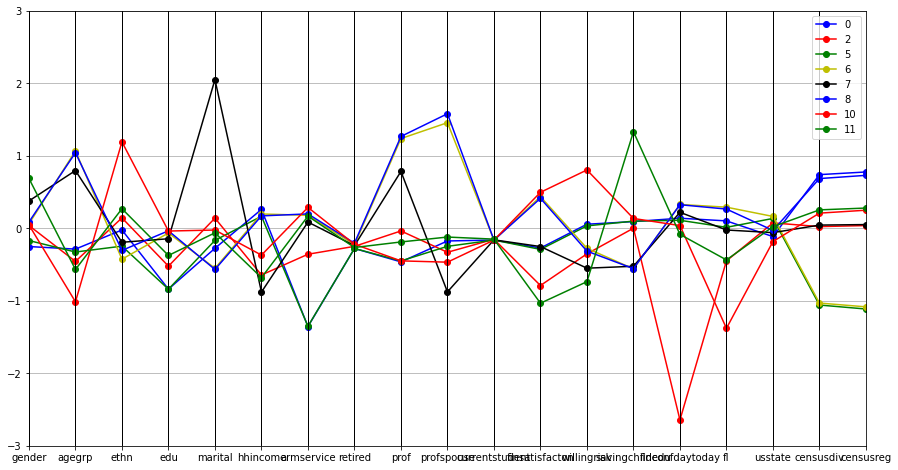

In [60]:
parallel_plot(P[P['edu'] < 0.4])

<ipython-input-70-959eec61ca19>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  parallel_plot(P[(P['fl'] > 0.5) & (df3['prof'] > 0.4)])
No handles with labels found to put in legend.


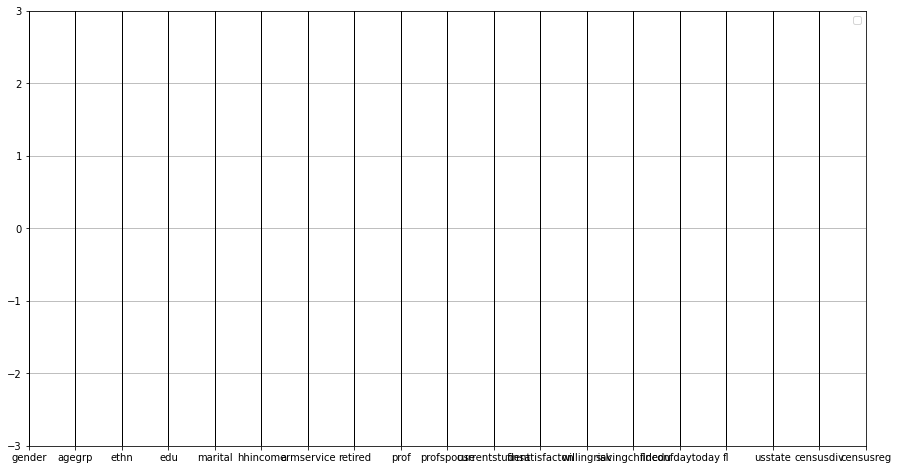

In [70]:
parallel_plot(P[(P['fl'] > 0.5) & (df3['prof'] > 0.4)])

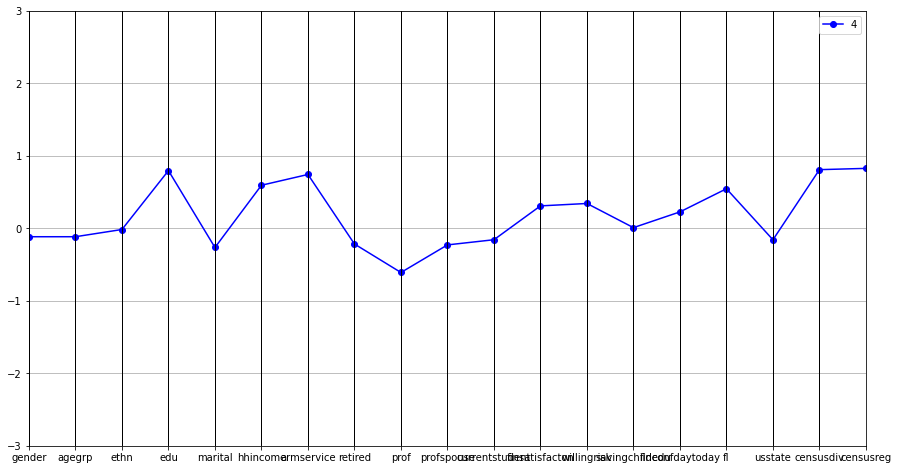

In [71]:
parallel_plot(P[P['fl'] > 0.5])

In [72]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0
  python_abi         conda-forge/osx-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::cond

ModuleNotFoundError: No module named 'geopy'

In [73]:
pip install geopy


     |████████████████████████████████| 111 kB 2.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [74]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values


In [75]:
CLIENT_ID = 'ST4GVXZAJHCFIT5OX14OEQULFQVRZAYA4LNN1NIVNPKZDESG' # your Foursquare ID
CLIENT_SECRET = 'ZHIKTYHA5C2FROABWGBYY55XGVARI0JLTV0PDRKANAK0CQ40' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ST4GVXZAJHCFIT5OX14OEQULFQVRZAYA4LNN1NIVNPKZDESG
CLIENT_SECRET:ZHIKTYHA5C2FROABWGBYY55XGVARI0JLTV0PDRKANAK0CQ40


In [76]:
address = 'US'
#address = '34 Grande Rue de la Guillotière 69007 Lyon'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [112]:
search_query = 'United States'
print(search_query + ' .... OK!')



United States .... OK!


In [113]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=ST4GVXZAJHCFIT5OX14OEQULFQVRZAYA4LNN1NIVNPKZDESG&client_secret=ZHIKTYHA5C2FROABWGBYY55XGVARI0JLTV0PDRKANAK0CQ40&ll=39.7837304,-100.4458825&v=20180604&query=United States&limit=30'

In [114]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f00fdef889e093619b71cbc'},
 'response': {'venues': [{'id': '5ee9b1328d0fc4000834871f',
    'name': 'United States Postal Service',
    'location': {'address': '135 E Hall St',
     'lat': 39.818738588990854,
     'lng': -100.52805393934244,
     'labeledLatLngs': [{'label': 'display',
       'lat': 39.818738588990854,
       'lng': -100.52805393934244}],
     'distance': 8035,
     'postalCode': '67749',
     'cc': 'US',
     'city': 'Oberlin',
     'state': 'KS',
     'country': 'United States',
     'formattedAddress': ['135 E Hall St',
      'Oberlin, KS 67749',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d172941735',
      'name': 'Post Office',
      'pluralName': 'Post Offices',
      'shortName': 'Post Office',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/postoffice_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1593900469',
    'hasPerk': False},
   {'id': '5ee97

In [115]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,5ee9b1328d0fc4000834871f,United States Postal Service,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",v-1593900469,False,135 E Hall St,39.818739,-100.528054,"[{'label': 'display', 'lat': 39.81873858899085...",8035,67749,US,Oberlin,KS,United States,"[135 E Hall St, Oberlin, KS 67749, United States]"
1,5ee979248ad98400082ce2d3,United States Postal Service,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",v-1593900469,False,123 S Kansas Ave,39.680269,-100.293509,"[{'label': 'display', 'lat': 39.6802686, 'lng'...",17401,67643,US,Jennings,KS,United States,"[123 S Kansas Ave, Jennings, KS 67643, United ..."
2,5ee9e31dcc3fb100077f2179,United States Postal Service,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",v-1593900469,False,106 S Decatur Ave,39.836758,-100.190879,"[{'label': 'display', 'lat': 39.8367582900202,...",22590,67653,US,Norcatur,KS,United States,"[106 S Decatur Ave, Norcatur, KS 67653, United..."
3,5ee9c65d2d054d000723c570,United States Postal Service,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",v-1593900469,False,306 S Quincy Ave,39.908235,-100.785618,"[{'label': 'display', 'lat': 39.90823495333513...",32174,67739,US,Herndon,KS,United States,"[306 S Quincy Ave, Herndon, KS 67739, United S..."
4,5ee9baa3f2d8e50008cc3431,United States Postal Service,"[{'id': '4bf58dd8d48988d172941735', 'name': 'P...",v-1593900469,False,205 Grandville Ave,40.039846,-100.405225,"[{'label': 'display', 'lat': 40.03984613153859...",28721,69026,US,Danbury,NE,United States,"[205 Grandville Ave, Danbury, NE 69026, United..."


In [116]:
uslatlang = dataframe[['location.state','location.lat', 'location.lng']]

In [117]:
uslatlang.head()

,location.state,location.lat,location.lng
0,KS,39.818739,-100.528054
1,KS,39.680269,-100.293509
2,KS,39.836758,-100.190879
3,KS,39.908235,-100.785618
4,NE,40.039846,-100.405225


In [111]:
uslatlang.shape

(10, 3)

In [120]:
pip install statsmodels

     |████████████████████████████████| 8.5 MB 3.3 MB/s eta 0:00:01     |█████                           | 1.3 MB 2.6 MB/s eta 0:00:03
     |████████████████████████████████| 231 kB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


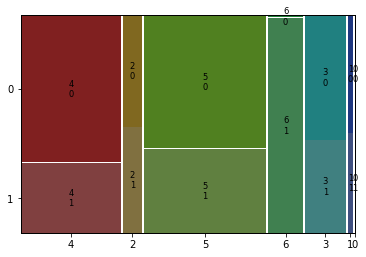

In [121]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
import pandas
 
#gender = ['male', 'male', 'male', 'female', 'female', 'female']
#pet = ['cat', 'dog', 'dog', 'cat', 'dog', 'cat']
#data = pandas.DataFrame({'gender': gender, 'pet': pet})
mosaic(df3, ['fl', 'credit_bin'])
plt.show()

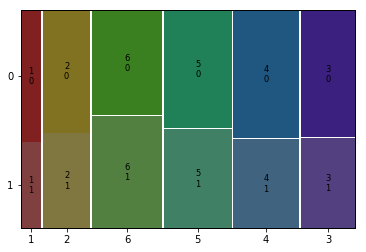

In [126]:
mosaic(df3, [ 'agegrp', 'credit_bin'])
plt.show()

In [127]:
#function imported from the course
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[2929  291]
 [  67 3905]]


Confusion matrix, without normalization
[[2929  291]
 [  67 3905]]


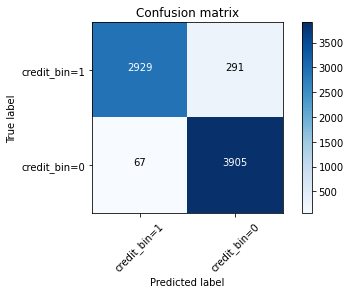

In [130]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['credit_bin=1','credit_bin=0'],normalize= False,  title='Confusion matrix')